# Visualize and Plot results

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
cmap = plt.get_cmap('tab10')

from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme()

data_path = "./data/"

#### Entanglement scaling

In [31]:
ent_path = data_path + "ent_scaling/"
idx_run = "10_4840" # Aer
idx_run = "10_4803"  # MPS
idx_run = "10_680" # Aer

ent_data = np.load(ent_path + idx_run + ".npy", allow_pickle=True)

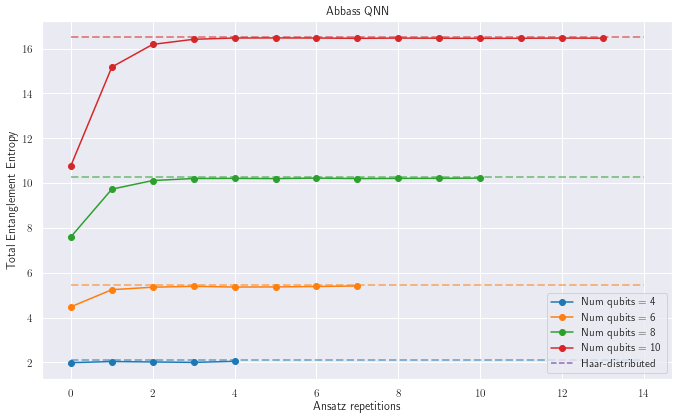

In [32]:
fig = plt.figure(figsize=(9.6, 6))
plt.title(f"Abbass QNN")
plt.ylabel("Total Entanglement Entropy")
plt.xlabel("Ansatz repetitions")

for idx, data in enumerate(ent_data):
    plt.hlines(data[1], 0, len(ent_data[-1][0]), ls="--", color=cmap(idx), lw = 2, alpha = 0.5)
    plt.plot(data[0], ls="-", marker="o", c=cmap(idx), label=f"Num qubits = {2*(idx+1)+2}")

plt.plot([],[], ls ='--', color = cmap(idx+1), label = "Haar-distributed")

plt.legend()
plt.tight_layout()
#plt.savefig(ent_path + "/Imgs/" + idx_run + ".pdf", format = "pdf")


### Optimal repetition

In [17]:
idx_run = "10_linear"
reps_data = np.load(data_path+"optimal_reps/" + idx_run + ".npz")

x = reps_data['x']
y = reps_data['y']
q = reps_data['q'] # intercept
m = reps_data['m'] # slope

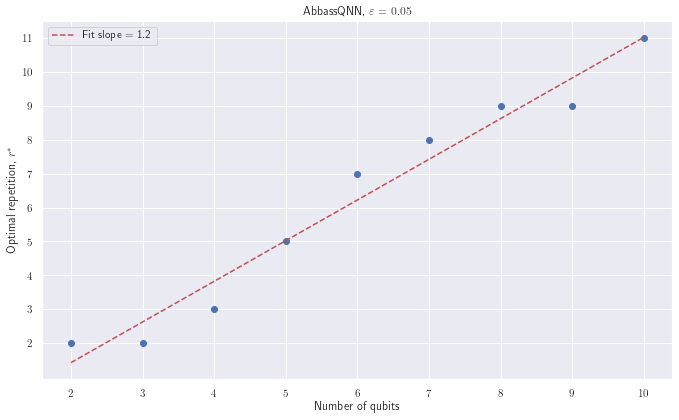

In [18]:
fig = plt.figure(figsize=(9.6, 6))

plt.title(fr"AbbassQNN, $\varepsilon={0.05}$")
plt.xlabel("Number of qubits")
plt.ylabel(fr"Optimal repetition, $r^*$")

plt.xticks(range(min(x), max(x)+1))
plt.yticks(range(min(y), max(y)+1))

plt.scatter(x, y, marker='o')
plt.plot(x, q + m * x, 'r', ls='--',
         label=f'Fit slope = {np.round(m,3)}')

plt.legend()
plt.tight_layout()